# Salary Prediction Model Training

### Step 1: Import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,VotingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

### Step 2: Load and Explore Data

In [6]:
df = pd.read_csv('salary_data.csv')

print("Dataset Shape:",df.shape)
print("\nFirst few rows:")
print(df.head())

Dataset Shape: (425, 6)

First few rows:
                  Job_Title  Years_of_Experience Education_Level   Location  \
0         Software Engineer                    2        Bachelor  Bangalore   
1  Senior Software Engineer                    5        Bachelor  Bangalore   
2            Data Scientist                    3          Master  Bangalore   
3           Product Manager                    6             MBA     Mumbai   
4        Frontend Developer                    1        Bachelor       Pune   

  Industry  Salary_INR  
0       IT      800000  
1       IT     1500000  
2       IT     1200000  
3       IT     2000000  
4       IT      600000  


In [7]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Job_Title            425 non-null    object
 1   Years_of_Experience  425 non-null    int64 
 2   Education_Level      425 non-null    object
 3   Location             425 non-null    object
 4   Industry             425 non-null    object
 5   Salary_INR           425 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 20.1+ KB
None


In [8]:
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
       Years_of_Experience    Salary_INR
count           425.000000  4.250000e+02
mean              6.089412  1.409059e+06
std               2.969421  7.240440e+05
min               0.000000  3.500000e+05
25%               4.000000  9.000000e+05
50%               6.000000  1.300000e+06
75%               8.000000  1.700000e+06
max              20.000000  5.500000e+06


### Step 3: Data Visualization

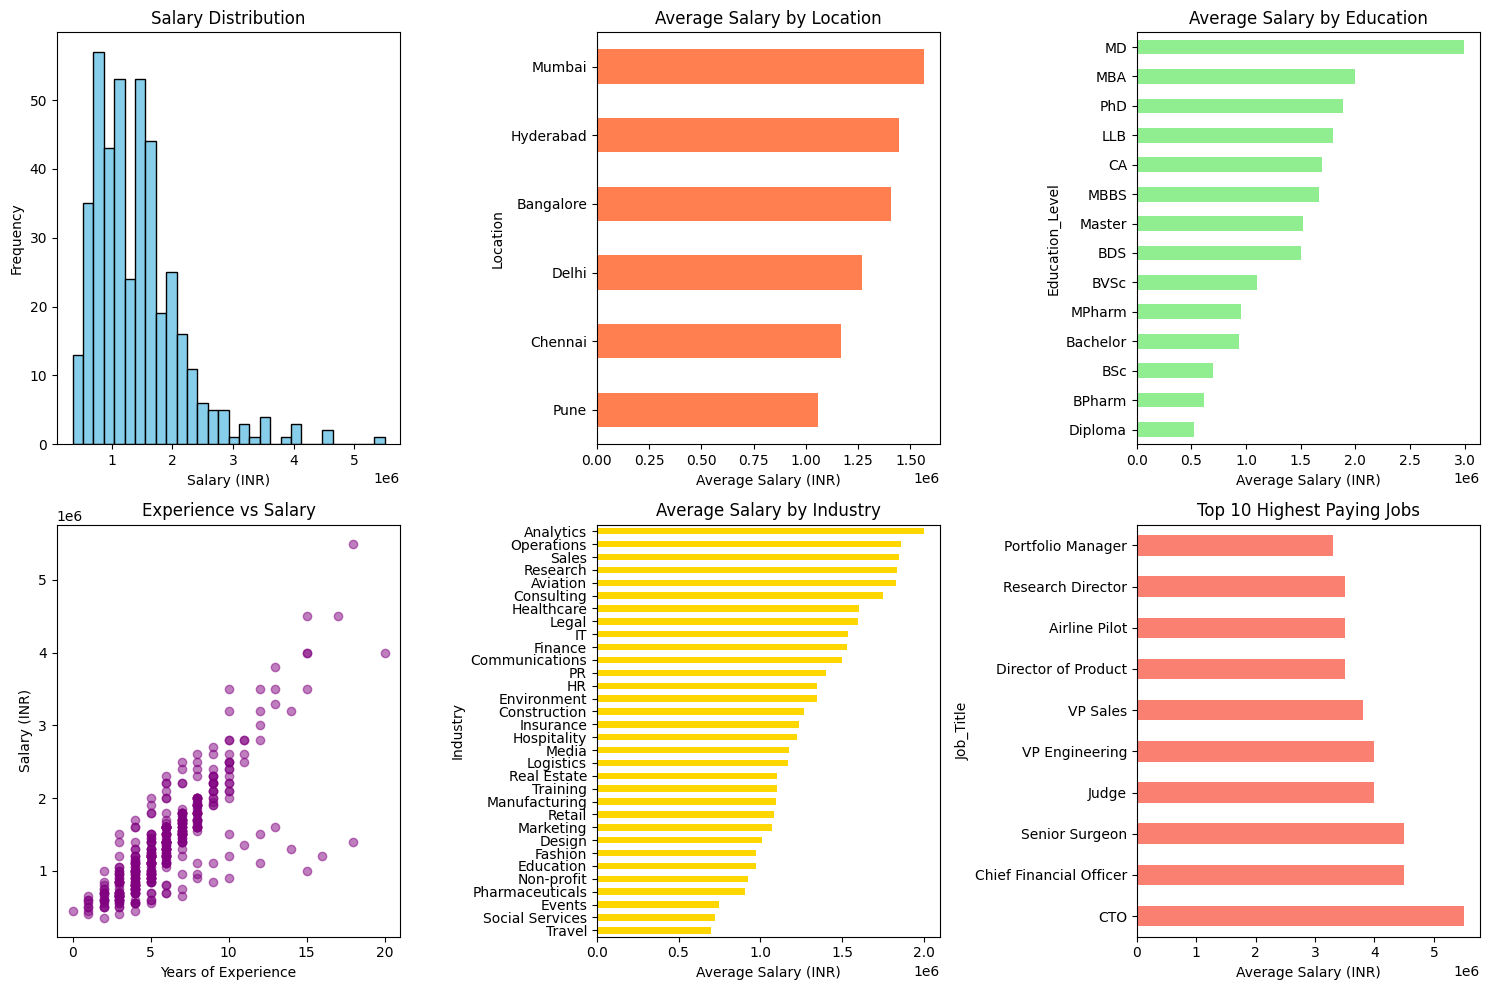

In [9]:
plt.figure(figsize = (15,10))

plt.subplot(2,3,1)
plt.hist(df['Salary_INR'],bins=30,color='skyblue',edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary (INR)')
plt.ylabel('Frequency')

plt.subplot(2,3,2)
df.groupby('Location')['Salary_INR'].mean().sort_values().plot(kind='barh',color='coral')
plt.title('Average Salary by Location')
plt.xlabel('Average Salary (INR)')

plt.subplot(2,3,3)
df.groupby('Education_Level')['Salary_INR'].mean().sort_values().plot(kind='barh',color='lightgreen')
plt.title('Average Salary by Education')
plt.xlabel('Average Salary (INR)')

plt.subplot(2,3,4)
plt.scatter(df['Years_of_Experience'],df['Salary_INR'],alpha=0.5,color='purple')
plt.title('Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (INR)')

plt.subplot(2,3,5)
df.groupby('Industry')['Salary_INR'].mean().sort_values().plot(kind='barh',color='gold')
plt.title('Average Salary by Industry')
plt.xlabel('Average Salary (INR)')

plt.subplot(2,3,6)
top_jobs = df.groupby('Job_Title')['Salary_INR'].mean().sort_values(ascending=False).head(10)
top_jobs.plot(kind = 'barh',color = 'salmon')
plt.title('Top 10 Highest Paying Jobs')
plt.xlabel('Average Salary (INR)')

plt.tight_layout()
plt.savefig('salary_analysis.png',dpi=300,bbox_inches='tight')
plt.show()

### Step 4: Data Preprocessing and Encoding

In [10]:
df_encoded = df.copy()

label_encoders = {}
categorical_columns = ['Job_Title','Education_Level','Location','Industry']

for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"{col}:{len(le.classes_)} unique values")

print("\nEncoded dataset:")
print(df_encoded.head())

joblib.dump(label_encoders,'label_encoders.pkl')
print("\nLabel encoders saved successfully!")

Job_Title:248 unique values
Education_Level:14 unique values
Location:6 unique values
Industry:32 unique values

Encoded dataset:
   Job_Title  Years_of_Experience  Education_Level  Location  Industry  \
0        213                    2                4         0        14   
1        203                    5                4         0        14   
2         50                    3               12         0        14   
3        129                    6                8         4        14   
4         74                    1                4         5        14   

   Salary_INR  
0      800000  
1     1500000  
2     1200000  
3     2000000  
4      600000  

Label encoders saved successfully!


### Step 5: Prepare Features and Target

In [11]:
X = df_encoded.drop('Salary_INR',axis=1)
y = df_encoded['Salary_INR']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"Features: {list(X.columns)}")

Training set size: 340
Testing set size: 85
Features: ['Job_Title', 'Years_of_Experience', 'Education_Level', 'Location', 'Industry']


### Step 6: Train Individual Models

In [12]:
print("Training Linear Regression Model...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Linear Regression trained")

print("\nTraining Random Forest Regressor...")
rf_model = RandomForestRegressor(n_estimators=100,random_state=42,n_jobs=-1)
rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest trained")

print("\nTraining Gradient Boosting Regressor...")
gb_model = GradientBoostingRegressor(n_estimators=100,random_state=42)
gb_model.fit(X_train,y_train)
gb_pred = gb_model.predict(X_test)
print("Gradient Boosting trained")

Training Linear Regression Model...
Linear Regression trained

Training Random Forest Regressor...
Random Forest trained

Training Gradient Boosting Regressor...
Gradient Boosting trained


### Step 7: Create Voting Ensemble

In [13]:
print("Creating Voting Ensemble...")
voting_model = VotingRegressor(
    estimators=[
        ('lr',LinearRegression()),
        ('rf',RandomForestRegressor(n_estimators=100,random_state=42,n_jobs=-1)),
        ('gb',GradientBoostingRegressor(n_estimators=100,random_state=42))
    ]
)
voting_model.fit(X_train, y_train)
voting_pred = voting_model.predict(X_test)
print("Voting Ensemble trained")

Creating Voting Ensemble...
Voting Ensemble trained


### Step 8: Evaluate All Models

In [14]:
def evaluate_model(y_true,y_pred,model_name):
    mae = mean_absolute_error(y_true,y_pred)
    mse = mean_squared_error(y_true,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true,y_pred)

    print(f"\n{model_name} Performance:")
    print(f"  Mean Absolute Error (MAE): ₹{mae:,.2f}")
    print(f"  Root Mean Squared Error (RMSE): ₹{rmse:,.2f}")
    print(f"  R² Score: {r2:.4f}")
    print(f"  Accuracy: {r2*100:.2f}%")

    return {'MAE':mae,'RMSE':rmse,'R2':r2}

results = {}
results['Linear Regression'] = evaluate_model(y_test,lr_pred,"Linear Regression")
results['Random Forest'] = evaluate_model(y_test,rf_pred,"Random Forest")
results['Gradient Boosting'] = evaluate_model(y_test,gb_pred,"Gradient Boosting")
results['Voting Ensemble'] = evaluate_model(y_test,voting_pred,"Voting Ensemble")


Linear Regression Performance:
  Mean Absolute Error (MAE): ₹254,709.76
  Root Mean Squared Error (RMSE): ₹385,872.33
  R² Score: 0.6984
  Accuracy: 69.84%

Random Forest Performance:
  Mean Absolute Error (MAE): ₹189,282.35
  Root Mean Squared Error (RMSE): ₹253,613.15
  R² Score: 0.8697
  Accuracy: 86.97%

Gradient Boosting Performance:
  Mean Absolute Error (MAE): ₹145,976.38
  Root Mean Squared Error (RMSE): ₹192,299.31
  R² Score: 0.9251
  Accuracy: 92.51%

Voting Ensemble Performance:
  Mean Absolute Error (MAE): ₹185,034.16
  Root Mean Squared Error (RMSE): ₹256,375.29
  R² Score: 0.8669
  Accuracy: 86.69%


### Step 9: Compare Model Performance


MODEL COMPARISON SUMMARY
                             MAE           RMSE        R2
Linear Regression  254709.757207  385872.330545  0.698438
Random Forest      189282.352941  253613.149130  0.869734
Gradient Boosting  145976.376090  192299.313884  0.925106
Voting Ensemble    185034.158054  256375.292726  0.866881 



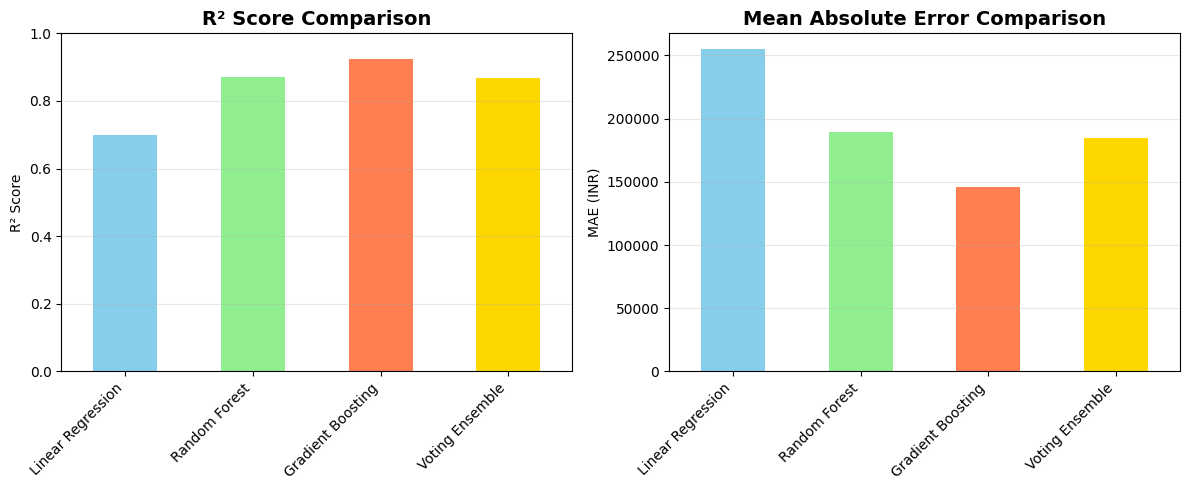

In [15]:
results_df = pd.DataFrame(results).T
print("\n"+"="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)
print(results_df,"\n")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
results_df['R2'].plot(kind='bar',color=['skyblue','lightgreen','coral','gold'])
plt.title('R² Score Comparison',fontsize=14,fontweight='bold')
plt.ylabel('R² Score')
plt.xticks(rotation=45,ha='right')
plt.ylim(0,1)
plt.grid(axis='y',alpha=0.3)

plt.subplot(1,2,2)
results_df['MAE'].plot(kind='bar',color=['skyblue','lightgreen','coral','gold'])
plt.title('Mean Absolute Error Comparison',fontsize=14,fontweight='bold')
plt.ylabel('MAE (INR)')
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y',alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison.png',dpi=300,bbox_inches='tight')
plt.show()

### Step 10: Feature Importance (Random Forest)


Feature Importance (Random Forest):
               Feature  Importance
1  Years_of_Experience    0.714766
4             Industry    0.119734
2      Education_Level    0.082001
0            Job_Title    0.062371
3             Location    0.021128 



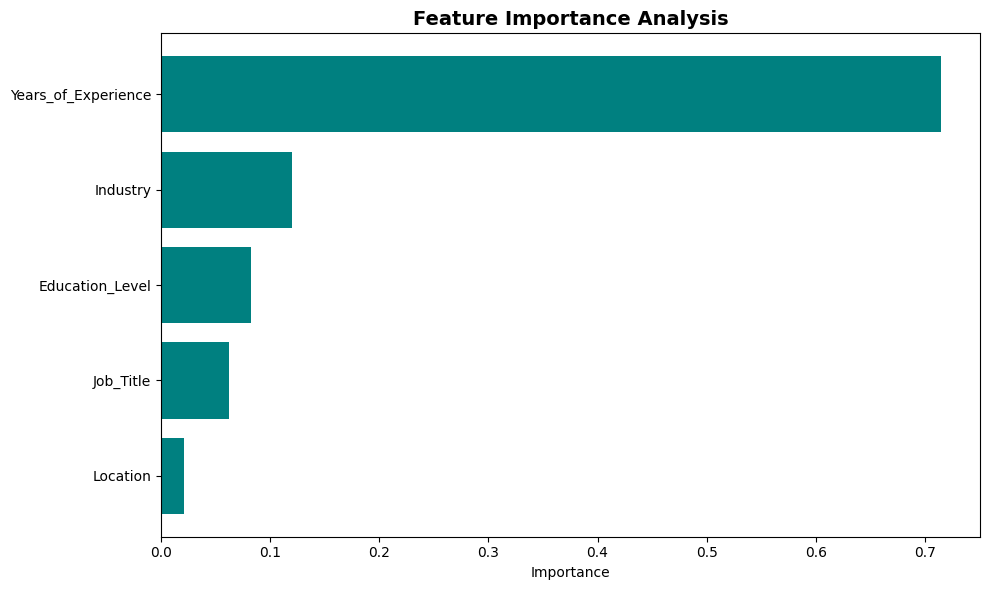

In [16]:
feature_importance = pd.DataFrame({
    'Feature':X.columns,
    'Importance':rf_model.feature_importances_
}).sort_values('Importance',ascending=False)

print("\nFeature Importance (Random Forest):")
print(feature_importance,"\n")

plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'],feature_importance['Importance'],color='teal')
plt.xlabel('Importance')
plt.title('Feature Importance Analysis',fontsize=14,fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance.png',dpi=300,bbox_inches='tight')
plt.show()

### Step 11: Save the Linear Regression Model for Frontend

In [17]:
joblib.dump(lr_model,'salary_model.pkl')
print("\nLinear Regression model saved as 'salary_model.pkl'")


Linear Regression model saved as 'salary_model.pkl'


### Step 12: Test Predictions

In [18]:
print("\n"+"="*60)
print("SAMPLE PREDICTIONS")
print("="*60)

sample_indices = [0,10,20,30,40]
for idx in sample_indices:
    actual = y_test.iloc[idx]
    lr_prediction = lr_pred[idx]
    rf_prediction = rf_pred[idx]
    gb_prediction = gb_pred[idx]
    voting_prediction = voting_pred[idx]

    print(f"\nSample {idx+1}:")
    print(f"  Actual Salary: ₹{actual:,.0f}")
    print(f"  Linear Regression: ₹{lr_prediction:,.0f} (Error: ₹{abs(actual-lr_prediction):,.0f})")
    print(f"  Random Forest: ₹{rf_prediction:,.0f} (Error: ₹{abs(actual-rf_prediction):,.0f})")
    print(f"  Gradient Boosting: ₹{gb_prediction:,.0f} (Error: ₹{abs(actual-gb_prediction):,.0f})")
    print(f"  Voting Ensemble: ₹{voting_prediction:,.0f} (Error: ₹{abs(actual-voting_prediction):,.0f})")


SAMPLE PREDICTIONS

Sample 1:
  Actual Salary: ₹1,300,000
  Linear Regression: ₹1,001,175 (Error: ₹298,825)
  Random Forest: ₹1,229,000 (Error: ₹71,000)
  Gradient Boosting: ₹1,259,914 (Error: ₹40,086)
  Voting Ensemble: ₹1,163,363 (Error: ₹136,637)

Sample 11:
  Actual Salary: ₹1,000,000
  Linear Regression: ₹1,123,598 (Error: ₹123,598)
  Random Forest: ₹1,253,000 (Error: ₹253,000)
  Gradient Boosting: ₹931,299 (Error: ₹68,701)
  Voting Ensemble: ₹1,102,632 (Error: ₹102,632)

Sample 21:
  Actual Salary: ₹1,200,000
  Linear Regression: ₹1,264,096 (Error: ₹64,096)
  Random Forest: ₹1,016,500 (Error: ₹183,500)
  Gradient Boosting: ₹988,562 (Error: ₹211,438)
  Voting Ensemble: ₹1,089,719 (Error: ₹110,281)

Sample 31:
  Actual Salary: ₹1,350,000
  Linear Regression: ₹1,349,469 (Error: ₹531)
  Random Forest: ₹1,233,000 (Error: ₹117,000)
  Gradient Boosting: ₹1,192,388 (Error: ₹157,612)
  Voting Ensemble: ₹1,258,286 (Error: ₹91,714)

Sample 41:
  Actual Salary: ₹1,350,000
  Linear Regressio

### Summary

**Models Trained:**
1. Linear Regression (used in frontend)
2. Random Forest Regressor
3. Gradient Boosting Regressor
4. Voting Ensemble (combines all three)

**Files Generated:**
- `salary_model.pkl` - Linear Regression model for frontend
- `label_encoders.pkl` - Encoders for categorical variables
- `salary_analysis.png` - Data visualizations
- `model_comparison.png` - Model performance comparison
- `feature_importance.png` - Feature importance chart

The Linear Regression model is used in the frontend for predictions, while the ensemble methods help improve overall accuracy in the backend.